## Import the dataset and the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
print(california.DESCR)  #data description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
data = pd.DataFrame(california.data,columns = california.feature_names)

In [6]:
data[california.target_names[0]] = california.target

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Preprocessing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
#according to information command there are no null values and every feature have float as data type
#the null values can also be verified using the following command
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Exploratory data Analysis

<Axes: >

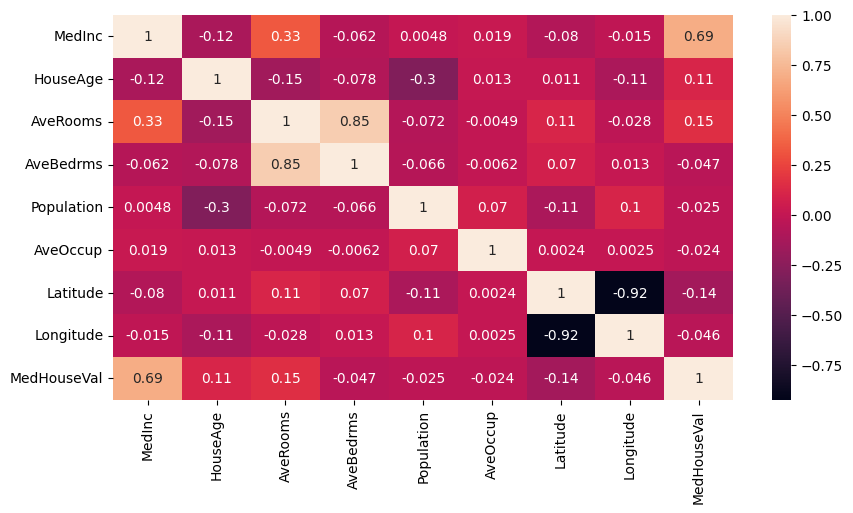

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True)

In [12]:
# The above heatmap shows the correlations in the independent and the dependent features, the finding from the above heatmap

Text(0, 0.5, 'Latitude')

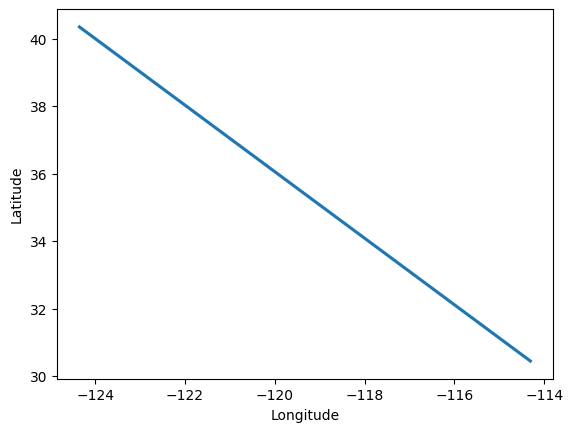

In [13]:
# 1. Longitudde and the latitude have a strong inverse relation
sns.regplot(x = 'Longitude', y = 'Latitude', data = data,scatter = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Median house value')

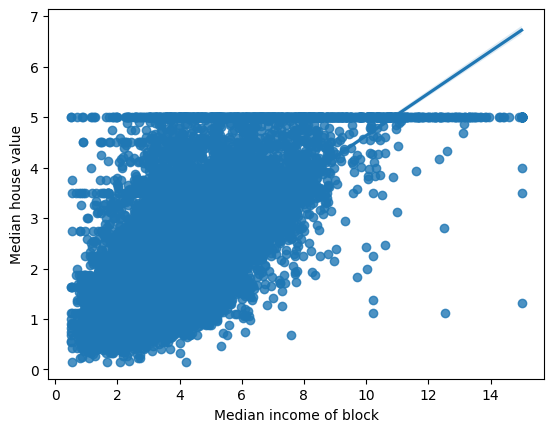

In [14]:
# 2. The dependent feature(Median house value) depends highly on meadian income of block group
sns.regplot(x = 'MedInc', y = 'MedHouseVal', data = data,scatter = True)
plt.xlabel('Median income of block')
plt.ylabel('Median house value')

Text(0, 0.5, 'Average Bedrooms')

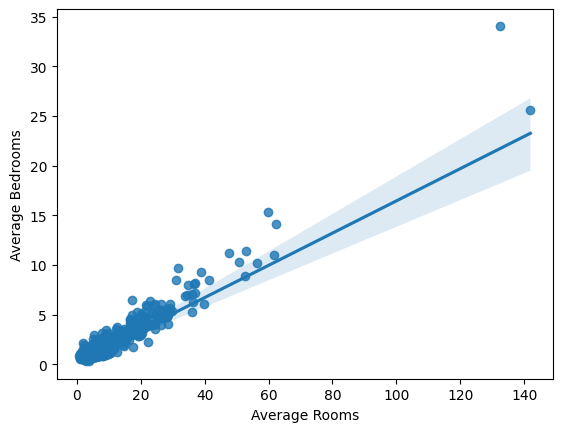

In [15]:
# 3. Average rooms and average bedrooms are highly correlated
sns.regplot(x = 'AveRooms', y = 'AveBedrms', data = data,scatter = True)
plt.xlabel('Average Rooms')
plt.ylabel('Average Bedrooms')

In [16]:
'''We can drop the highly correlated features but in this case as the dimensionality of the data is very less (d = 8)
so it's better not to drop the features as this might lead to an underfitted model'''

"We can drop the highly correlated features but in this case as the dimensionality of the data is very less (d = 8)\nso it's better not to drop the features as this might lead to an underfitted model"

## Splitting and scaling the data

In [17]:
x = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.3,random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Model Selection & Training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(xtrain,ytrain)

LinearRegression()

In [25]:
# Weights/coefficients of the model
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [26]:
# intercept of the model
print(regression.intercept_)

2.0692396089424165


In [27]:
# parameters of model
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Testing and evaluating the model

In [28]:
reg_pred = regression.predict(xtest)

Text(0, 0.5, 'Actual')

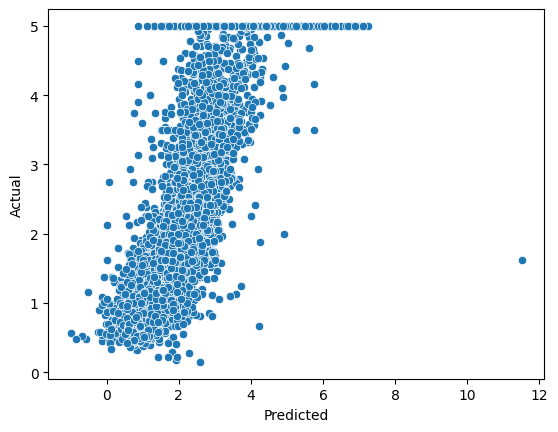

In [29]:
## evaluating the predictions with actual values
sns.scatterplot(x = reg_pred,y = ytest)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
# as we can see from the above plot the distribution of the predicted and the actual values follows a linear pattern
# so we can say that the model is good to go
# we can also solidify this from the next graphs

In [31]:
# calculating the residuals
residuals = ytest-reg_pred

Text(0.5, 1.0, 'Residuals')

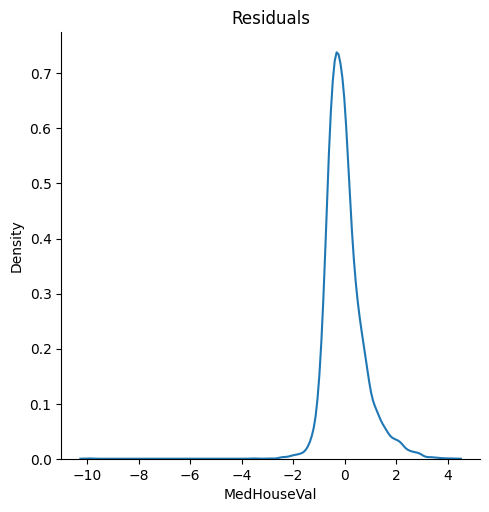

In [32]:
sns.displot(residuals,kind = 'kde')
plt.title('Residuals')

In [33]:
#The residuals follow a normal curve with some outliers

Text(0, 0.5, 'residuals')

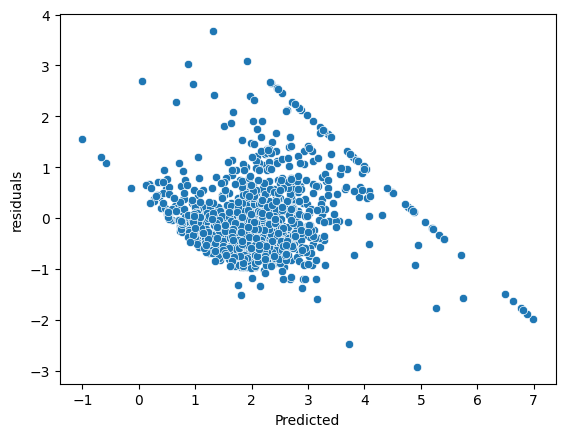

In [34]:
sns.scatterplot(x = reg_pred[:1000],y = residuals[:1000])
plt.xlabel('Predicted')
plt.ylabel('residuals')

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [36]:
print(f'mean absolute error: {mean_absolute_error(ytest,reg_pred)}')
print(f'mean squared error: {mean_squared_error(ytest,reg_pred)}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(ytest,reg_pred))}')

mean absolute error: 0.5272474538305955
mean squared error: 0.5305677824766752
root mean squared error: 0.7284008391515452


#### R2 Score and adjusted R2 score

r2 score  = 1-(Sum of Squared Residuals/Sum of Squared total)
where SSR = (y-ypred)^2 and SST = (y-ybar)^2

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where R2 is the r2 of the model, n = no. of observations, k = no. of predictor variables

In [37]:
from sklearn.metrics import r2_score

In [38]:
score=r2_score(ytest,reg_pred)
score

0.5957702326061664

In [39]:
n = len(ytest)
k = xtest.shape[1]
adj_r2 = 1-(((1-score)*(n-1))/(n-k-1))
adj_r2

0.5952472117200025

## Predicting New Data

In [40]:
california.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [41]:
california.data[0].shape

(8,)

In [42]:
new_data = california.data[0].reshape(1,-1) # equal to tranpose of the unidirectional vector

In [43]:
new_data = scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
new_data

array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [45]:
regression.predict(new_data)

array([4.14333441])

## Pickling the model file for deployment

In [46]:
import pickle

In [47]:
pickle.dump(regression,open('/content/drive/MyDrive/regmodel.pkl','wb'))

In [48]:
pickle_model = pickle.load(open('/content/drive/MyDrive/regmodel.pkl','rb'))

In [49]:
pickle_model.predict(new_data)

array([4.14333441])